# Fourier Transformation

<pre>
1. Consider that a medical image is taken from a dataset. Using numpy, apply fourier transformation over the input image and observe the output. 
2. Consider that a medical image is taken from a dataset. Using OpenCV, apply fourier transformation over the input image and observe the output.
</pre>

# Kaggle Dataset

## Drive Connection

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Get key

In [ ]:
!mkdir /root/.kaggle/
!cp /drive/MyDrive/kaggle.json /root/.kaggle/

## Download dataset

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 5.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=29af37eccab2bfa8f007feb3e5462b3dd1715eeed3cddd9e7fc72bd121289319
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.50G/9.51G [03:11<00:00, 55.1MB/s]
100% 9.51G/9.51G [03:11<00:00, 53.4MB/s]


In [ ]:
!unzip -qq aptos2019-blindness-detection.zip

# Get image to work on from dataset

In [ ]:
# get file name
import os

IMAGE_DIR = "train_images"
IMAGE_NAME = os.listdir(IMAGE_DIR)[0]
print(IMAGE_NAME)

1968183f0e61.png


# Get image from web

In [ ]:
!wget https://media.wired.com/photos/5c523ece95d28a2cb5b76db1/1:1/w_494,h_494,c_limit/Backchannel-Lena-Soderberg-FA.jpg -O image_reserve.jpg
IMAGE_DIR_2 = ""
IMAGE_NAME_2 = "image_reserve.jpg"

--2022-03-04 12:41:25--  https://media.wired.com/photos/5c523ece95d28a2cb5b76db1/1:1/w_494,h_494,c_limit/Backchannel-Lena-Soderberg-FA.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54209 (53K) [image/jpeg]
Saving to: ‘image_reserve.jpg’

image_reserve.jpg   100%[===================>]  52.94K  --.-KB/s    in 0.001s  

2022-03-04 12:41:25 (47.3 MB/s) - ‘image_reserve.jpg’ saved [54209/54209]



# Loading and resizing image

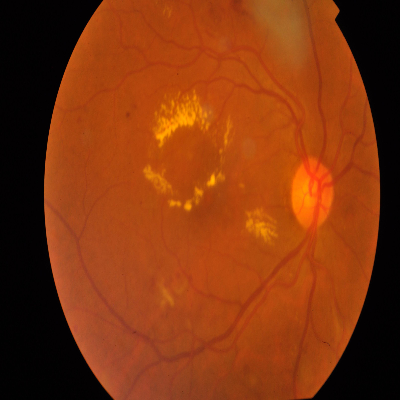

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

IMG_ORIGINAL = cv2.imread(os.path.join(IMAGE_DIR, IMAGE_NAME))

MAX_PIXEL = 255

# resize for better visibility
IMAGE_SIZE = (400, 400)
IMG = cv2.resize(IMG_ORIGINAL, IMAGE_SIZE)
cv2_imshow(IMG)

# Grayscale image

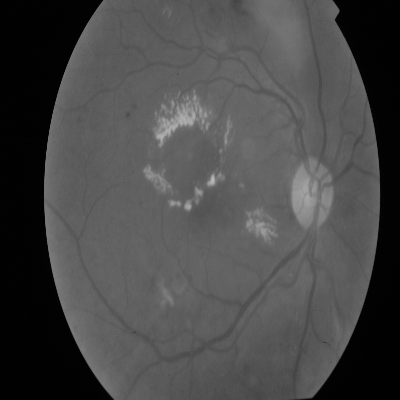

In [ ]:
IMG_GRAY = cv2.cvtColor(IMG, cv2.COLOR_BGR2GRAY)
cv2_imshow(IMG_GRAY)

# Trials on kaggle dataset of choice

## Using numpy

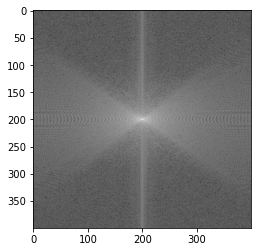

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = np.fft.fft2(IMG_GRAY)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap="gray")

## Using OpenCV

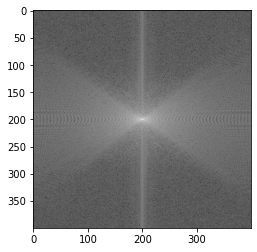

In [ ]:
import numpy as np
import cv2

dft = cv2.dft(np.float32(IMG_GRAY), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.imshow(magnitude_spectrum, cmap="gray")

# Trials on image from internet

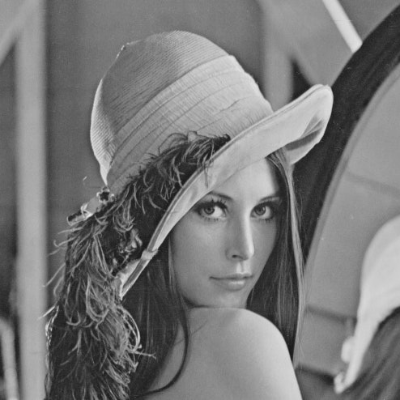

In [ ]:
IMG_2 = cv2.imread(os.path.join(IMAGE_DIR_2, IMAGE_NAME_2))
IMG_GRAY2 = cv2.cvtColor(IMG_2, cv2.COLOR_BGR2GRAY)
IMG_GRAY2 = cv2.resize(IMG_GRAY2, IMAGE_SIZE)
cv2_imshow(IMG_GRAY2)

## Using numpy

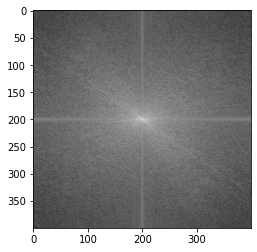

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = np.fft.fft2(IMG_GRAY2)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap="gray")

## Using OpenCV

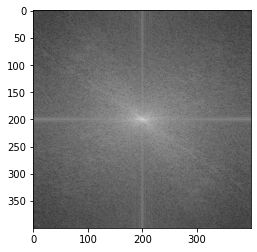

In [ ]:
import numpy as np
import cv2

dft = cv2.dft(np.float32(IMG_GRAY2), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

plt.imshow(magnitude_spectrum, cmap="gray")